In [2]:
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import copy 
from scipy import stats
%matplotlib inline
from leaspy import Leaspy, IndividualParameters, AlgorithmSettings, Data
import pandas as pd

In [11]:
def plot_individuals(df, feature,  sublist=None):
    plt.figure(figsize=(12, 6))
    
    if sublist is None:
        sublist = df.index.unique('ID')
        
    colors =  sns.color_palette(palette='icefire', n_colors=len(sublist), desat=None, as_cmap=False)
    
    for c, idx in zip(colors, sublist):
        indiv_df = df.loc[idx]
        
        ages = indiv_df.index.get_level_values(0).astype('str')
        real_values = indiv_df[feature].values
        plt.plot(ages, real_values, c=c)
        plt.xlabel("Year")
        plt.ylabel(feature)
        plt.title("Evolution for each County of " + feature)

def individual_linear_regression_against_time(df, feature):
    
    # individual linear regressions on each feature, to study individual progression (with linear regression against age)
    lin_reg_on_frame_time_y = lambda t: pd.Series(dict(zip(['slope','intercept','correl_coef','pval','stderr','intercept_stderr'], 
                                                        stats.linregress(t.values))))
    
    
    # select individuals with at least 3 visits
    s = df[feature].dropna()
    #nb_visits_with_data = s.groupby('ID').size()
    #s = s.loc[nb_visits_with_data[nb_visits_with_data >= 3].index]
    
    return s.reset_index('TIME').groupby('ID').apply(lin_reg_on_frame_time_y)

In [4]:
df = pd.read_csv("C:\\Users\\ljens\\OneDrive\\Documents\\APHA\\data.csv")

In [7]:
df.set_index(['ID','TIME'], inplace=True)

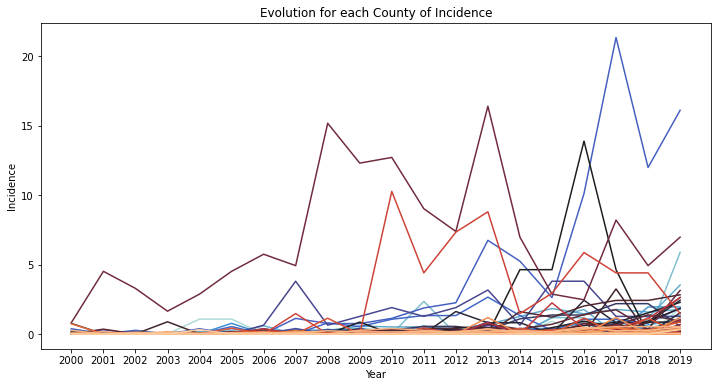

In [12]:
plot_individuals(df, 'Incidence')

In [13]:
df.head()

Cases  Incidence  Extreme Heat  Extreme Precip.  \
ID     TIME                                                    
Alcona 2000      0        0.0             7                2   
       2001      0        0.0            19                4   
       2002      0        0.0            25                3   
       2003      0        0.0            11                3   
       2004      0        0.0             7                4   

             Average Monthly Rainfall  Average Temp (F)   Pop.  \
ID     TIME                                                      
Alcona 2000                  2.414167         44.050000  11677   
       2001                  2.378333         46.150000  11665   
       2002                  2.227500         45.125000  11480   
       2003                  2.412500         43.075000  11495   
       2004                  2.560000         43.766667  11459   

             Reported Ticks  Forest Cover (%)  Total Rainfall  
ID     TIME                                                    
Alcona 2000             1.0               NaN           28.97  
       2001             1.0              56.3           28.54  
       2002             0.0               NaN           26.73  
       2003             1.0               NaN           28.95  
       2004             1.0               NaN           30.72

In [16]:
state_incidence = (df.groupby('TIME')['Cases'].sum()) / (df.groupby('TIME')['Pop.'].sum()) * 100000

In [19]:
state_incidence_df = pd.DataFrame(state_incidence)

In [24]:
state_incidence_df.reset_index(inplace=True)

In [25]:
state_incidence_df['TIME'].astype('str')

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
Name: TIME, dtype: object

In [27]:
state_incidence_df['TIME'].apply(lambda x: str(x))

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
Name: TIME, dtype: object

In [29]:
state_incidence_df['TIME'] = state_incidence_df['TIME'].apply(lambda x: str(x))

In [1]:
state_incidence_df.head()

NameError: name 'state_incidence_df' is not defined

Text(0.5, 1.0, 'Evolution of MI Lyme Disease Incidence')

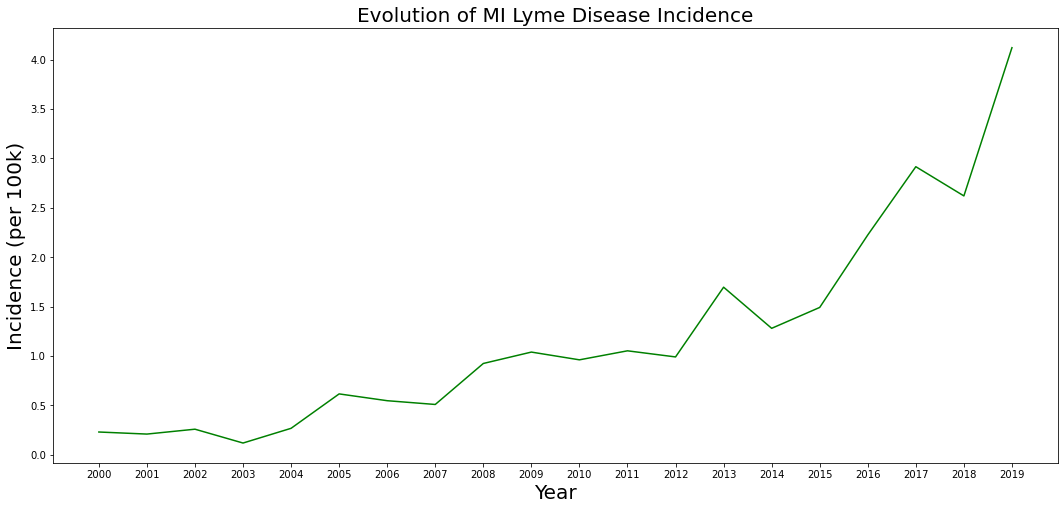

In [33]:
plt.figure(figsize=(18, 8))
#sublist = state_inc.index.values
colors =  sns.color_palette(palette='deep', n_colors=len(state_incidence_df), desat=None, as_cmap=False)
plt.plot(state_incidence_df['TIME'], state_incidence_df[0], c='g')
plt.xlabel("Year", fontsize=20)
plt.ylabel('Incidence (per 100k)', fontsize=20)
plt.title("Evolution of MI Lyme Disease Incidence", fontsize=20)
